In [26]:
__author__ = 'alexandrerame'

import numpy as np
import json
from pprint import pprint
import math
import matplotlib.pyplot as plt

def getData(prop=1./3,oh=1):

    trX=[[]]
    trY=[]

    for y in range(4):
        file=getFile(y)
        with open(file) as data_file:
            data = json.load(data_file)

        size=len(data)
        print(size)

        for i in range(size):
            datX=np.array(data[i]['gravityBurst'])
            sizeDat=len(datX)

            accX=datX.flatten()[0:sizeDat:4][0:31]
            accY=datX.flatten()[1:sizeDat:4][0:31]
            accZ=datX.flatten()[2:sizeDat:4][0:31]
            T=datX[3:sizeDat:4].flatten()[0:31]
            fftX=np.fft.fft(accX)
            fftY=np.fft.fft(accY)
            fftZ=np.fft.fft(accZ)

            #plotprint(fftY,y)


            features=np.concatenate((fftX,fftY,fftZ),axis=1)

            if len(features)>=93:
                trX=np.append(trX,features[0:93])
                trY=np.append(trY,y)
            #else:
                #print(len(features))


    trX=np.reshape(trX,(-1,93))
    l=len(trX)
    cut=l*prop
    
    arrayRandom=np.random.permutation(l)

    trX=trX[arrayRandom,:]
    trY=trY[arrayRandom]
    if oh:
        trY = one_hot(trY, 4)
    teX=trX[:cut,:]
    teY=trY[:cut]
    trX=trX[cut:,:]
    trY=trY[cut:]
    
    return trX,trY,teX,teY

def getFile(y):
    if y==0:
        return "STILL.json"
    elif y==1:
        return "WALKING.json"
    elif y==2:
        return "RUNNING.json"
    else:
        return "BIKING.json"

def one_hot(x,n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten().astype(int)
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)),x] = 1
    return o_h

def plotprint(vec,y):
    if y==0:
        plt.plot(vec,color='r')
    if y==1:
        plt.plot(vec,color='b')
    if y==2:
        plt.plot(vec,color='g')
    if y==3:
        plt.plot(vec,color='m')

if __name__ == '__main__':
    trX,trY,teX,teY=getData()
    print(teY)



22
31
5
7
[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]]


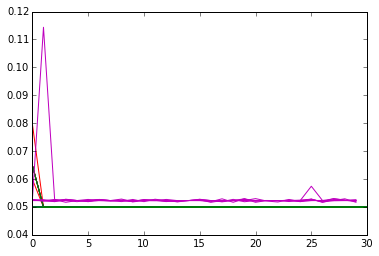

In [27]:
if __name__ == '__main__':
    trX,trY,teX,teY=getData(100)
    print(teY)
    plt.show()


In [10]:
plt.show()